<a href="https://colab.research.google.com/github/diascarolina/data-science-bootcamp/blob/main/modulo6/aulas_desafios_modulo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science Bootcamp

# Module 06 - Data Science in Finance

Notebook for the lessons and proposed challenges.

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Lesson 01

In [2]:
approved_clients_raw = pd.read_csv('https://github.com/diascarolina/data-science-bootcamp/blob/main/data/approved_clients.csv?raw=true')
client_records_raw = pd.read_csv('https://github.com/diascarolina/data-science-bootcamp/blob/main/data/client_record.csv?raw=true')

In [3]:
client_records_raw.head()

,id,gender,own_car,own_property,children_count,annual_income,income_type,education_type,marital_status,housing_type,age,own_cellphone,own_workphone,own_phone,own_email,occupation_type,family_size,years_working
0,5008804,m,1,1,0,427500.0,working,higher_education,civil_marriage,rented_apartment,33.0,1,1,0,0,others,2.0,12.4
1,5008805,m,1,1,0,427500.0,working,higher_education,civil_marriage,rented_apartment,33.0,1,1,0,0,others,2.0,12.4
2,5008806,m,1,1,0,112500.0,working,secondary,married,house_apartment,59.0,1,0,0,0,security,2.0,3.1
3,5008808,f,0,1,0,270000.0,commercial_associate,secondary,single,house_apartment,52.0,1,0,1,1,sales,1.0,8.4
4,5008809,f,0,1,0,270000.0,commercial_associate,secondary,single,house_apartment,52.0,1,0,1,1,sales,1.0,8.4


In [4]:
client_records_raw.shape

(438557, 18)

In [5]:
client_records_raw.id.value_counts()

7603224    2
7742853    2
7836711    2
7091721    2
7022327    2
          ..
5372264    1
6412652    1
6410605    1
6367602    1
6291456    1
Name: id, Length: 438510, dtype: int64

We can see that we have some repeated IDs.

In [6]:
client_records_raw.duplicated().sum()

0

This means that we don't have whole rows duplicated.

In [7]:
client_records_raw[client_records_raw.id.duplicated(keep = False)].shape

(94, 18)

So we have 94 problematic values (47 repeated ones). Let's save them.

In [8]:
repeated_ids = client_records_raw[client_records_raw.id.duplicated(keep = False)].id

In [9]:
client_records = client_records_raw.copy()
client_records = client_records.drop(repeated_ids.index)

In [10]:
client_records.shape

(438463, 18)

In [11]:
client_records.id.value_counts()

6293503    1
5166449    1
6210931    1
5174645    1
5170551    1
          ..
7410037    1
6357367    1
6375806    1
5683584    1
6291456    1
Name: id, Length: 438463, dtype: int64

Now we have only one ID per row.

Do we have null data?

In [12]:
print(f'Number of null values in client_records: {client_records.isnull().sum().sum()}')

Number of null values in client_records: 0


In [13]:
client_records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               438463 non-null  int64  
 1   gender           438463 non-null  object 
 2   own_car          438463 non-null  int64  
 3   own_property     438463 non-null  int64  
 4   children_count   438463 non-null  int64  
 5   annual_income    438463 non-null  float64
 6   income_type      438463 non-null  object 
 7   education_type   438463 non-null  object 
 8   marital_status   438463 non-null  object 
 9   housing_type     438463 non-null  object 
 10  age              438463 non-null  float64
 11  own_cellphone    438463 non-null  int64  
 12  own_workphone    438463 non-null  int64  
 13  own_phone        438463 non-null  int64  
 14  own_email        438463 non-null  int64  
 15  occupation_type  438463 non-null  object 
 16  family_size      438463 non-null  floa

# Lesson 02

In [14]:
quantitative_variables = ['age', 'children_count', 'annual_income', 'years_working', 'family_size']

In [15]:
client_records[quantitative_variables].describe()

,age,children_count,annual_income,years_working,family_size
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,-165.936036,2.194461
std,11.472815,0.724879,1.100832e+05,380.201131,0.897194
min,21.000000,0.000000,2.610000e+04,-1000.700000,1.000000
25%,34.000000,0.000000,1.215000e+05,1.000000,2.000000
50%,43.000000,0.000000,1.611000e+05,4.000000,2.000000
75%,53.000000,1.000000,2.250000e+05,8.500000,3.000000
max,69.000000,19.000000,6.750000e+06,48.000000,20.000000


Taking a look at the table above, how can someone have ```years_working``` equal to -1000.7?

In [16]:
client_records.query("years_working <= 0")[['years_working', 'income_type']].value_counts()

years_working  income_type         
-1000.7        pensioner               75314
 0.0           working                    26
               state_servant              11
               commercial_associate        7
dtype: int64

We see that all ```years_working == -1000.7``` are pensioners.

In [17]:
client_records.query("income_type == 'pensioner'")['income_type'].value_counts()

pensioner    75478
Name: income_type, dtype: int64

Almost all pensioners have ```years_working == -1000.7```.

In [18]:
client_records['years_working'] = client_records['years_working'].replace(-1000.7, -1)

In [19]:
client_records[quantitative_variables].describe()

,age,children_count,annual_income,years_working,family_size
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,5.780633,2.194461
std,11.472815,0.724879,1.100832e+05,6.733151,0.897194
min,21.000000,0.000000,2.610000e+04,-1.000000,1.000000
25%,34.000000,0.000000,1.215000e+05,1.000000,2.000000
50%,43.000000,0.000000,1.611000e+05,4.000000,2.000000
75%,53.000000,1.000000,2.250000e+05,8.500000,3.000000
max,69.000000,19.000000,6.750000e+06,48.000000,20.000000


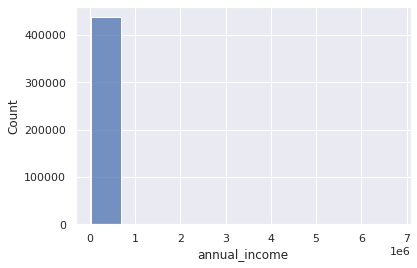

In [20]:
sns.histplot(data = client_records, x = 'annual_income', bins = 10)
plt.show()

Let's remove tha outliers.

In [21]:
annual_income_column = client_records['annual_income']
avg_annual_income = annual_income_column.mean()
std_annual_income = annual_income_column.std()

upper_limit = avg_annual_income + (2 * std_annual_income)
lower_limit = avg_annual_income - (2 * std_annual_income)

outlier_index = []
for index, value in annual_income_column.items():
    if value > upper_limit or value < lower_limit:
        outlier_index.append(index)

print(f'We have {len(outlier_index)} outliers in the annual income column.')

We have 12641 outliers in the annual income column.


In [22]:
client_records = client_records.drop(outlier_index)
client_records.shape

(425822, 18)

In [23]:
client_records[quantitative_variables].describe()

,age,children_count,annual_income,years_working,family_size
count,425822.000000,425822.000000,425822.000000,425822.000000,425822.000000
mean,43.838707,0.425314,176384.728083,5.744956,2.191683
std,11.525400,0.723577,75033.530551,6.736649,0.896300
min,21.000000,0.000000,26100.000000,-1.000000,1.000000
25%,34.000000,0.000000,117000.000000,1.000000,2.000000
50%,43.000000,0.000000,157500.000000,4.000000,2.000000
75%,53.000000,1.000000,225000.000000,8.500000,3.000000
max,69.000000,19.000000,405000.000000,48.000000,20.000000


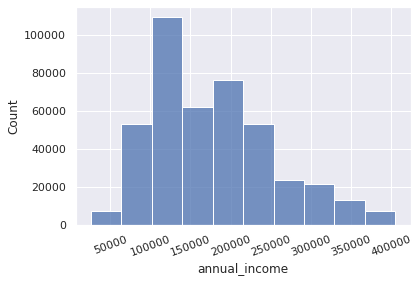

In [24]:
sns.histplot(data = client_records, x = 'annual_income', bins = 10)
plt.xticks(rotation = 20)
plt.show()

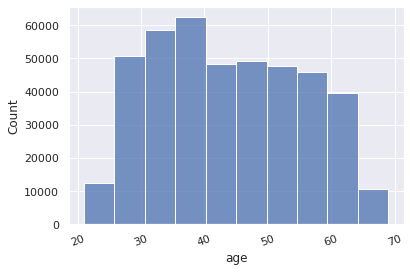

In [25]:
sns.histplot(data = client_records, x = 'age', bins = 10)
plt.xticks(rotation = 20)
plt.show()

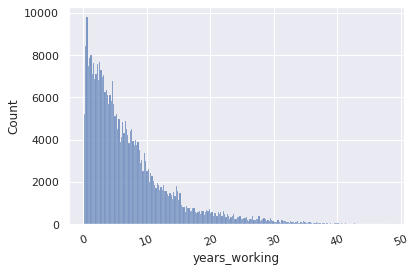

In [26]:
sns.histplot(data = client_records.query("years_working > 0"), x = 'years_working')
plt.xticks(rotation = 20)
plt.show()

In [27]:
client_records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425822 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               425822 non-null  int64  
 1   gender           425822 non-null  object 
 2   own_car          425822 non-null  int64  
 3   own_property     425822 non-null  int64  
 4   children_count   425822 non-null  int64  
 5   annual_income    425822 non-null  float64
 6   income_type      425822 non-null  object 
 7   education_type   425822 non-null  object 
 8   marital_status   425822 non-null  object 
 9   housing_type     425822 non-null  object 
 10  age              425822 non-null  float64
 11  own_cellphone    425822 non-null  int64  
 12  own_workphone    425822 non-null  int64  
 13  own_phone        425822 non-null  int64  
 14  own_email        425822 non-null  int64  
 15  occupation_type  425822 non-null  object 
 16  family_size      425822 non-null  floa

In [28]:
categorical_variables = ['gender', 'own_car', 'own_property', 'income_type',
                         'education_type', 'marital_status', 'housing_type',
                         'own_cellphone', 'own_workphone', 'own_phone', 'own_email',
                         'occupation_type']

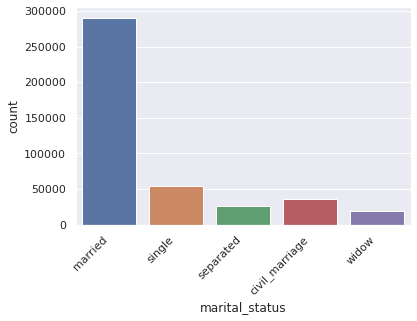

In [29]:
sns.countplot(data = client_records, x = 'marital_status')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

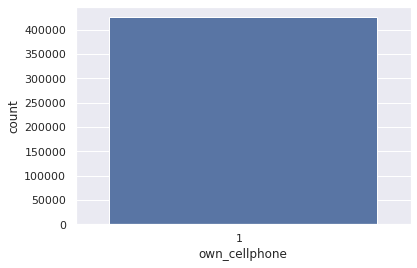

In [30]:
sns.countplot(data = client_records, x = 'own_cellphone')
plt.xticks(ha = 'right')
plt.show()

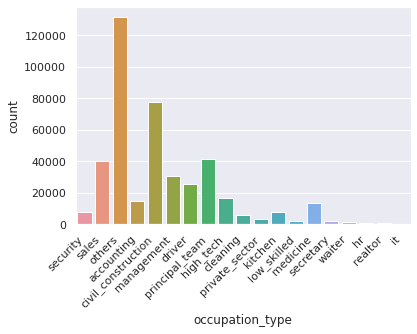

In [31]:
sns.countplot(data = client_records, x = 'occupation_type')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

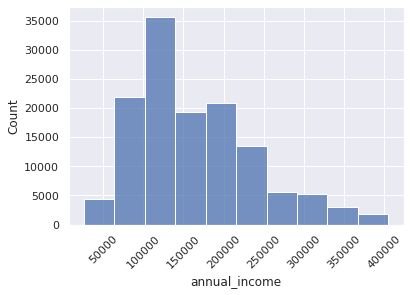

In [32]:
sns.histplot(data = client_records.query("occupation_type == 'others'"), x = 'annual_income', bins = 10)
plt.xticks(rotation = 45)
plt.show()

We have seen that the variable ``own_cellphone``` has only one alue, so it is not relevant for our future machine learning model.

Also, we will drop the gender variable in order to avoid a bias.

In [33]:
client_records = client_records.drop(['gender', 'own_cellphone'], axis = 1)

In [34]:
client_records.shape

(425822, 16)

Let's update our categorical variables.

In [35]:
categorical_variables.remove('gender')
categorical_variables.remove('own_cellphone')

# Lesson 03

Let's now take a look at the approved clients.

In [36]:
approved_clients = approved_clients_raw.copy()

In [37]:
approved_clients.head()

,id,month,status
0,5001711,0,no_loan
1,5001711,-1,1-29days
2,5001711,-2,1-29days
3,5001711,-3,1-29days
4,5001712,0,paid_loan


In [38]:
approved_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   id      1048575 non-null  int64 
 1   month   1048575 non-null  int64 
 2   status  1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [40]:
approved_clients.id.value_counts().shape

(45985,)